



#Présenté Par:
- Mbéry Sene GNING
-Awa SENE



## Projet final algorithmique
### Objectifs
* Decouvrir les librairies pandas, networkx, folium
* Comprendre les ADT et implementer une File, une Pile
https://en.wikipedia.org/wiki/Abstract_data_type
* Comprendre les methodes de parcours de graphe
* BFS ou parcours en largeur https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
* DFS ou parcours en profondeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
* Comprendre les heuristiques de search en IA
https://online-learning.harvard.edu/course/cs50s-introduction-artificial-intelligence-python
* Cours IA
https://cs50.harvard.edu/ai/2020/
https://courses.edx.org/courses/course-v1:HarvardX+CS50AI+1T2020/courseware/3b4d945d89eb40bcad81746770a81c3b/918082613c254e2da55e31d1894bc4be/?activate_block_id=block-v1%3AHarvardX%2BCS50AI%2B1T2020%2Btype%40sequential%2Bblock%40918082613c254e2da55e31d1894bc4be

**Precision importante: Il est attendu la presentation des algorithmes

1.   Élément de liste
2.   Élément de liste

sous forme itérative et recursive ainsi que calcul de leur complexite**

### Partie 1
* Decouvrir les librairies pandas, networkx, folium

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

%matplotlib inline

### Lire le fichier de graphe avec pandas en utilisant read_csv
* Documentation sur pandas: http://www.python-simple.com/python-pandas/dataframes-indexation.php

In [2]:
from google.colab import files
uploaded = files.upload()

Saving transport-nodes.csv to transport-nodes.csv
Saving transport-relationships.csv to transport-relationships.csv


#### TODO: Utilisez la bibliothéque pandas pour lire les fichiers transport-nodes.csv et transport-relationships.csv

In [3]:
transport_nodes=pd.read_csv('/content/transport-nodes.csv')
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [4]:
transport_arcs=pd.read_csv('/content/transport-relationships.csv')
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


### TODO: Construire le graphe et le visualiser  avec la fonction from_pandas_dataframe de networkx
https://networkx.github.io/
* Dessiner le graphe avec la fonction draw de networkX

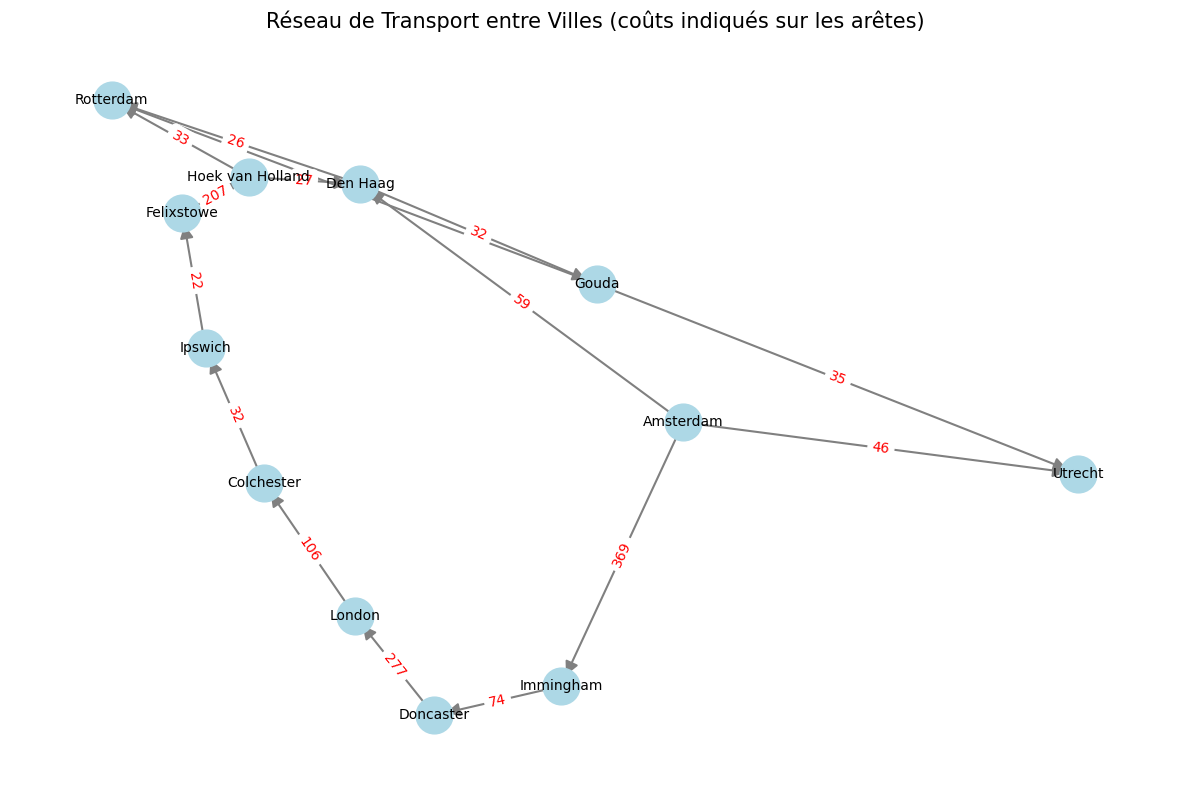

In [5]:


# Créer un graphe orienté (DiGraph)
Graphe = nx.from_pandas_edgelist(
    transport_arcs,
    source='src',
    target='dst',
    edge_attr=['relationship', 'cost'],
    create_using=nx.DiGraph()
)

# Dessiner le graphe
plt.figure(figsize=(12, 8))

# Disposition des nœuds
pos = nx.spring_layout(Graphe, seed=42)  # seed pour une disposition cohérente

# Dessiner les nœuds et les arêtes
nx.draw_networkx_nodes(Graphe, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(Graphe, pos, width=1.5, edge_color='gray', arrows=True,arrowsize=20)

# Étiquettes des nœuds
nx.draw_networkx_labels(Graphe, pos, font_size=10, font_family='sans-serif')

# Étiquettes des arêtes (coûts)
edge_labels = nx.get_edge_attributes(Graphe, 'cost')
nx.draw_networkx_edge_labels(Graphe, pos, edge_labels=edge_labels,font_color='red')

# Titre et affichage
plt.title("Réseau de Transport entre Villes (coûts indiqués sur les arêtes)", size=15)
plt.axis('off')  # Désactiver les axes
plt.tight_layout()
plt.show()

| Étape                 | Complexité                    |
| --------------------- | ----------------------------- |
| Création du graphe    | O(E)                          |
| Disposition (layout)  | O(N²) – O(N³)                 |
| Dessin des nœuds      | O(N)                          |
| Dessin des arêtes     | O(E)                          |
| Étiquettes des nœuds  | O(N)                          |
| Étiquettes des arêtes | O(E)                          |
| **Total dominant**    | **O(N²)** à cause du layout|


E est le nombre d’arêtes (lignes du DataFrame),N est le nombre de nœuds.

\![Capture%20d%E2%80%99e%CC%81cran%202020-05-15%20a%CC%80%2022.27.50.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202020-05-15%20a%CC%80%2022.27.50.png)

In [6]:
dict(Graphe.nodes())

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Rotterdam': {},
 'Immingham': {},
 'Doncaster': {},
 'London': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'Gouda': {}}

### TODO: Ajouter des attributs longitude et latitude aux noeuds avec Networkx en utilisant:
* le dictionnaire "node" de networkx qui contient les noeuds
* le dataframe transportnode defini plus haut
* Des exemples d'utilisation de la fonction set_node_attributes
https://www.programcreek.com/python/example/89530/networkx.set_node_attributes

In [7]:
'''
Ajouter des attributs
Inputs:
    Un graphe,
    un dataframe contenant les données,
    nom de l'attribut,
    le nom de la colonne index du dataframe
Pas d'output:
Utiilisez la fonction set_node_attributes de networkx

'''
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
     # Crée un dictionnaire {nom_noeud: valeur_attribut}
    attributs = dfnoeuds.set_index(nomIndex)[nomAttribut].to_dict()

    # Applique les attributs aux nœuds du graphe
    nx.set_node_attributes(myGraphe, attributs, nomAttribut)


| *Instruction*                                                 | *Description*                                  | *Complexité temporelle* | *Complexité spatiale* |
| --------------------------------------------------------------- | ------------------------------------------------ | ------------------------- | ----------------------- |
| dfnoeuds[nomAttribut].values                                  | Extraction des valeurs d'une colonne             | O(n)                      | O(n)                    |
| dfnoeuds[nomIndex]                                            | Extraction des indices                           | O(n)                      | O(n)                    |
| pd.Series(..., index=...)                                     | Création d'une Series à partir des deux colonnes | O(n)                      | O(n)                    |
| .to_dict()                                                    | Conversion de la Series en dictionnaire          | O(n)                      | O(n)                    |
| nx.set_node_attributes(myGraphe, attributs, name=nomAttribut) | Affectation des attributs aux nœuds du graphe    | O(n)                      | O(n)                    |

In [8]:
ajouterAttribut(Graphe,transport_nodes,'latitude','id')
ajouterAttribut(Graphe,transport_nodes,'longitude','id')
ajouterAttribut(Graphe,transport_nodes,'population','id')

In [9]:
dict(Graphe.nodes())

{'Amsterdam': {'latitude': 52.379189,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876,
  'longitude': 5.10448,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288788,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.61239,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.90421,
  'population': 104390},
 'Gouda': {'latitude': 52.01667, 'longitude': 4.70833,

In [10]:
dict(Graphe.edges())

{('Amsterdam', 'Utrecht'): {'relationship': 'EROAD', 'cost': 46},
 ('Amsterdam', 'Den Haag'): {'relationship': 'EROAD', 'cost': 59},
 ('Amsterdam', 'Immingham'): {'relationship': 'EROAD', 'cost': 369},
 ('Den Haag', 'Rotterdam'): {'relationship': 'EROAD', 'cost': 26},
 ('Den Haag', 'Gouda'): {'relationship': 'EROAD', 'cost': 32},
 ('Immingham', 'Doncaster'): {'relationship': 'EROAD', 'cost': 74},
 ('Doncaster', 'London'): {'relationship': 'EROAD', 'cost': 277},
 ('London', 'Colchester'): {'relationship': 'EROAD', 'cost': 106},
 ('Hoek van Holland', 'Den Haag'): {'relationship': 'EROAD', 'cost': 27},
 ('Hoek van Holland', 'Rotterdam'): {'relationship': 'EROAD', 'cost': 33},
 ('Felixstowe', 'Hoek van Holland'): {'relationship': 'EROAD', 'cost': 207},
 ('Ipswich', 'Felixstowe'): {'relationship': 'EROAD', 'cost': 22},
 ('Colchester', 'Ipswich'): {'relationship': 'EROAD', 'cost': 32},
 ('Gouda', 'Rotterdam'): {'relationship': 'EROAD', 'cost': 25},
 ('Gouda', 'Utrecht'): {'relationship': 'ER

### Representer les noeuds sur une carte avec Folium

In [11]:
import folium
'''
On construit le Map avec une location par defaut
'''

basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='OpenStreetMap'
)



In [12]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [13]:
for i in Graphe.nodes:
    folium.Marker([Graphe.nodes[i]['latitude'],Graphe.nodes[i]['longitude']],tooltip = 'Population '+str(Graphe.nodes[i]['longitude'])).add_to(basemap)

![Capture%20d%E2%80%99e%CC%81cran%202020-05-16%20a%CC%80%2000.08.31.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202020-05-16%20a%CC%80%2000.08.31.png)

In [14]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
Input: le graphe
Output: Une liste de couples representant les longitudes et latitudes d'un point et d'un de ses voisins
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.nodes:

        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.nodes[i]["latitude"],myGraphe.nodes[i]["longitude"]])
            S.append([myGraphe.nodes[neighbor]["latitude"],myGraphe.nodes[neighbor]["longitude"]])
            points.append(S)
    return points



| *Instruction*                          | *Description*                              | *Complexité temporelle* | *Complexité spatiale*   |
| ---------------------------------------- | -------------------------------------------- | ------------------------- | ------------------------- |
| for i in myGraphe.nodes:               | Parcours de tous les nœuds                   | O(n)                      | O(1)                      |
| for neighbor in myGraphe.neighbors(i): | Parcours des voisins de chaque nœud          | O(m)                      | O(1)                      |
| S = []                                 | Création d'une sous-liste temporaire         | O(1)                      | O(1)                      |
| S.append([...]) (2 fois)               | Ajout des coordonnées du nœud et du voisin   | O(1)                      | O(1)                      |
| points.append(S)                       | Ajout de la sous-liste à la liste principale | O(1)                      | O(1) par itération → O(m) |
| return points                          | Retourne la liste des points                 | O(1)                      | O(m)                      |

Temporelle : O(n + m)

Spatiale : O(m)

In [15]:
coordonneesvoisins = construirePointsImage(Graphe)

### TODO: Visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes

In [16]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
Output: la carte
'''
def visualiserFolium(myGraphe, locationpardefaut=[52.3791890, 4.899431], tiles='Stamen Toner'):
    # Construire les points pour les arcs en utilisant la fonction fournie
    points = construirePointsImage(myGraphe)
    # Ajouter les noeuds à la carte
    for node in myGraphe.nodes:
        lat = myGraphe.nodes[node]["latitude"]
        lon = myGraphe.nodes[node]["longitude"]
        folium.Marker(
            location=[lat, lon],
            popup=f"Noeud: {node}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(basemap)

    # Ajouter les arcs (relations entre les noeuds) sous forme de lignes
    for arc in points:
        folium.PolyLine(
            locations=arc,
            color='green',
            weight=2.5,
            opacity=1
        ).add_to(basemap)
    return basemap

| *Instruction*                                         | *Description*                                    | *Temporelle*  | *Spatiale*    |
| ------------------------------------------------------- | -------------------------------------------------- | --------------- | --------------- |
| points = construirePointsImage(myGraphe)              | Construction de la liste des segments arcs         | O(n + m)        | O(m)            |
| for node in myGraphe.nodes:                           | Parcours de tous les nœuds                         | O(n)            | O(1)            |
| folium.Marker(...).add_to(basemap) (dans la boucle)   | Création et ajout des marqueurs (1 par nœud)       | O(1) × n → O(n) | O(1) × n → O(n) |
| for arc in points:                                    | Parcours de tous les arcs (segments entre voisins) | O(m)            | O(1)            |
| folium.PolyLine(...).add_to(basemap) (dans la boucle) | Création et ajout des lignes reliant les nœuds     | O(1) × m → O(m) | O(1) × m → O(m) |
| return basemap                                        | Retour de l’objet folium Map                       | O(1)            | O(1)            |

Complexité totale :

    Temporelle : O(n + m)

    Spatiale : O(n + m)

In [17]:
visualiserFolium(Graphe,coordonneesvoisins)

### Partie 2
* Dans cette partie vous allez implémenter des ADT: Noeud, Graphe, File, Pile



#### Implementer la classe Noeud
* Un noeud a un nom
* Un noeud a des attributs sous forme de dictionnaire pyton avec comme cle:
    une liste de coordonnes ( latitude, longitude)
    
    la taille de la population
* La liste des voisins sera initialisée à la création des arcs dans le graphe
*  Vous ajouterez toutes les methodes nécessaires
        
    
        

In [18]:

class Noeud:
    def __init__(self, name):
        self.name = name
        self.attributs = {}
        self.voisins = []

    def setAttribut(self, key, value):
        self.attributs[key] = value

    def getAttribut(self, key):
        return self.attributs.get(key, None)

    def getName(self):
        return self.name

    def ajouterVoisin(self, voisin):
        if voisin not in self.voisins:
            self.voisins.append(voisin)

    def __str__(self):
        """
        Représentation textuelle du nœud pour affichage
        """
        return f"Noeud({self.name}, attributs={self.attributs}, voisins={self.voisins})"

    def egal(self, noeud):
        return self.name == noeud.name

| *Méthode / Instruction*       | *Description*                                   | *Temporelle* | *Spatiale* |
| ------------------------------- | ------------------------------------------------- | -------------- | ------------ |
| __init__(self, name)          | Initialisation d’un nœud avec nom et attributs    | O(1)           | O(1)         |
| setAttribut(self, key, value) | Ajout d’une paire clé-valeur dans un dictionnaire | O(1) amorti\*  | O(1) par clé |
| getAttribut(self, key)        | Accès à une valeur dans un dictionnaire           | O(1)           | O(1)         |
| getName(self)                 | Retour du nom                                     | O(1)           | O(1)         |
| egal(self, noeud)             | Comparaison des noms (chaînes)                    | O(k)†          | O(1)         |

* L’insertion dans un dict Python est en temps amorti O(1)

† k = longueur maximale des noms à comparer

#### Implementer la classe Graphe
* Les noeuds des graphes doivent être initialisé à l'aide du fichier
transport-node.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* Les arcs des graphes doivent être initialisé à l'aide du fichier
transport-relations.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
* On doit avoir la liste des noeuds voisins d'un noeud donné. Le graphe est non orienté donc le voisinage est reciproque
        

In [24]:
class Graphe:
    def __init__(self):
        self.noeuds = [] # Liste des objets Noeud
        self.arcs = {}   # Dictionnaire : nom du noeud → liste de (voisin, coût)

    def creerNoeuds(self, fichiernoeuds):
        """Crée les nœuds à partir d'un fichier CSV"""
        try:
            with open(fichiernoeuds, mode='r') as fichier:
                reader = csv.DictReader(fichier)
                print(f"Colonnes du fichier : {', '.join(reader.fieldnames)}")
                count = 0
                for row in reader:
                    noeud = Noeud(row['id'])
                    noeud.setAttribut('coordonnees', [float(row['latitude']), float(row['longitude'])])
                    noeud.setAttribut('population', int(row['population']))
                    self.noeuds.append(noeud)
                    self.arcs[noeud.getName()] = []
                    count += 1
                print(f"{count} noeuds créés.")
                return count
        except FileNotFoundError:
            print(f"Erreur : fichier {fichiernoeuds} non trouvé.")
            return 0
        except Exception as e:
            print(f"Erreur de lecture du fichier : {e}")
            return 0

    def creerArc(self, fichierarcs):
        """Crée les arcs à partir d'un fichier CSV"""
        try:
            with open(fichierarcs, mode='r') as fichier:
                reader = csv.DictReader(fichier)
                print(f"Colonnes du fichier : {', '.join(reader.fieldnames)}")
                count = 0
                for row in reader:
                    src = row['src']
                    dst = row['dst']
                    cost = float(row['cost'])
                    if src in self.arcs and dst in self.arcs:
                        self.arcs[src].append((dst, cost))
                        self.arcs[dst].append((src, cost))
                        self.getNoeud(src).ajouterVoisin(dst)
                        self.getNoeud(dst).ajouterVoisin(src)
                        count += 1
                print(f"{count} arcs créés.")
                return count
        except FileNotFoundError:
            print(f"Erreur : fichier {fichierarcs} non trouvé.")
            return 0
        except Exception as e:
            print(f"Erreur de lecture du fichier : {e}")
            return 0

    def getNoeud(self, name):
        """Retourne un noeud par son nom"""
        for noeud in self.noeuds:
            if noeud.getName() == name:
                return noeud
        return None

    def getVoisins(self, noeud):
        """Retourne les voisins d'un noeud"""
        if isinstance(noeud, Noeud):
            name = noeud.getName()
        else:
            name = noeud
        return self.arcs.get(name, [])

    def getCoordonnesVoisins(self, noeud):
        """Retourne les coordonnées des voisins d'un noeud"""
        listecoord = []
        if isinstance(noeud, str):
            noeud = self.getNoeud(noeud)
        for voisin in self.getVoisins(noeud):
            noeudVoisin = self.getNoeud(voisin[0])
            listecoord.append([
                noeud.getAttribut('coordonnees'),
                noeudVoisin.getAttribut('coordonnees')
            ])
        return listecoord

    def getListeCoordonnees(self, listeNoeuds):
        """Retourne les coordonnées d'une liste de noeuds"""
        coord = []
        for name in listeNoeuds:
            noeud = self.getNoeud(name)
            if noeud:
                coord.append(noeud.getAttribut('coordonnees'))
        return coord

    def visualiserFolium(self, locationpardefaut=[52.3791890, 4.899431], tiles='OpenStreetMap', explored=None):
        """Visualiser le graphe avec Folium"""
        m = folium.Map(location=locationpardefaut, zoom_start=6, tiles=tiles)

        # Afficher les noeuds
        for noeud in self.noeuds:
            folium.CircleMarker(
                location=noeud.getAttribut('coordonnees'),
                radius=5,
                popup=f"{noeud.getName()}<br>Population: {noeud.getAttribut('population')}",
                color='blue',
                fill=True
            ).add_to(m)

            # Tracer les arcs
            locations = self.getCoordonnesVoisins(noeud)
            if locations:
                folium.PolyLine(locations, color="red", weight=2.5, opacity=1).add_to(m)

        # Chemin exploré
        if explored:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=3, opacity=1).add_to(m)

        return m

    def nombreNoeuds(self):
        """Retourne le nombre de noeuds"""
        return len(self.noeuds)

    def nombreArcs(self):
        """Retourne le nombre d'arcs"""
        count = sum(len(voisins) for voisins in self.arcs.values())
        return count // 2  # Diviser par 2 pour graphe non orienté


| *Méthode*                        | *Description*                                       | *Complexité Temporelle* | *Complexité Spatiale* | *Dépend de*                        |
| ---------------------------------- | ----------------------------------------------------- | ------------------------- | ----------------------- | ------------------------------------ |
| __init__                         | Initialise un graphe vide                             | O(1)                      | O(1)                    | —                                    |
| creerNoeuds(fichier)             | Lit un fichier CSV et crée les nœuds                  | O(n)                      | O(n)                    | n = nombre de lignes/nœuds         |
| creerArc(fichier)                | Lit un fichier CSV et crée les arcs (bidirectionnels) | O(m)                      | O(m)                    | m = nombre d’arcs (lignes valides) |
| getNoeud(name)                   | Recherche séquentielle du nœud par nom                | O(n)                      | O(1)                    | n = nb de nœuds                    |
| getVoisins(noeud)                | Accès direct aux voisins via dict                   | O(1)                      | O(1)                    | —                                    |
| getCoordonnesVoisins(noeud)      | Cherche coordonnées des voisins (via getNoeud)      | O(d·n)                    | O(d)                    | d = degré du nœud                  |
| getListeCoordonnees(listeNoeuds) | Cherche coordonnées d’une liste de noms               | O(k·n)                    | O(k)                    | k = taille de la liste             |
| visualiserFolium(...)            | Crée la carte folium avec marqueurs et arcs           | O(n·d·n + n + v) ≈ O(n²)  | O(n + v)                | v = taille de explored           |

In [25]:
G = Graphe()
G.creerNoeuds('/content/transport-nodes.csv')

Colonnes du fichier : id, latitude, longitude, population
12 noeuds créés.


12

In [26]:
G.creerArc('/content/transport-relationships.csv')

Colonnes du fichier : src, dst, relationship, cost
15 arcs créés.


15

In [32]:
G.visualiserFolium()

### Partie 3
* Implementer les classes File et Pile en utilisant les list en python
* Quelques liens interessants:
https://openclassrooms.com/fr/courses/900279-apprenez-a-programmer-avec-ada/2144666-les-types-abstraits-de-donnees-listes-files-piles

https://fr.wikipedia.org/wiki/Type_abstrait

http://www.csi.uottawa.ca/~flocchin/CSI2510/CSI2510PileFile.pdf



In [33]:
class Pile():
    '''
    Classe Pile: Dernier arrivé, premier servi (LIFO)
    La classe utilise une liste pour stocker les éléments.
    '''
    def __init__(self):
        self.elements = []

    '''
    Insère un objet en tête de la pile
    '''
    def push(self, noeud):
        self.elements.append(noeud)

    '''
    Retourne True si un noeud est dans la pile
    '''
    def contains_noeud(self, name):
        return name in self.elements

    '''
    Retourne True si la pile est vide
    '''
    def empty(self):
        return len(self.elements) == 0

    '''
    Retourne et supprime l'élément en tête de la pile
    Lance une exception si la pile est vide
    '''
    def remove(self):
        if self.empty():
            raise IndexError("La pile est vide")
        return self.elements.pop()

    '''
    Retourne l'élément en tête de la pile sans le supprimer
    '''
    def top(self):
        if self.empty():
            raise IndexError("La pile est vide")
        return self.elements[-1]


| Méthode                | Description                                          | Complexité Temporelle | Complexité Spatiale  |
| ---------------------- | ---------------------------------------------------- | --------------------- | -------------------- |
| __init__             | Initialise une pile vide                             | *O(1)*              | *O(1)*             |
| push(noeud)          | Ajoute un élément à la fin de la liste (sommet pile) | *O(1)*              | *O(1)* (par appel) |
| contains_noeud(name) | Cherche si un noeud est dans la pile                 | *O(n)*              | *O(1)*             |
| empty()              | Vérifie si la pile est vide                          | *O(1)*              | *O(1)*             |
| remove()             | Supprime l’élément au sommet                         | *O(1)*              | *O(1)*             |

In [34]:
# Création d'une pile
pile = Pile()

# Ajouter des éléments dans la pile
pile.push("A")
pile.push("B")
pile.push("C")

# Vérifier si un élément est dans la pile
print("La pile contient 'B' ?", pile.contains_noeud("B"))
print("La pile est vide ?", pile.empty())

# Afficher et supprimer l'élément au sommet de la pile
print("Élément au sommet:", pile.top())
print("Élément retiré:", pile.remove())

# Afficher l'état après suppression
print("Élément au sommet après retrait:", pile.top())


La pile contient 'B' ? True
La pile est vide ? False
Élément au sommet: C
Élément retiré: C
Élément au sommet après retrait: B


In [35]:
class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File.
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''

    def remove(self):
        if self.empty():
            raise IndexError("La file est vide")
        return self.elements.pop(0)  # Retirer l'élément au début de la liste


| Méthode                | Description                                        | Complexité Temporelle | Complexité Spatiale  |
| ---------------------- | -------------------------------------------------- | --------------------- | -------------------- |
| __init__             | Initialise une file vide                           | *O(1)*              | *O(1)*             |
| push(noeud)          | Ajoute un élément à la fin de la file              | *O(1)*              | *O(1)* (par appel) |
| contains_noeud(name) | Cherche si un noeud est dans la file               | *O(n)*              | *O(1)*             |
| empty()              | Vérifie si la file est vide                        | *O(1)*              | *O(1)*             |
| remove() (modifiée)  | Retire l'élément en *tête* de la file (pop(0)) | *O(n)*              | *O(1)*             |

In [36]:
# Créer une file
file = File()

# Ajouter des éléments
file.push('A')
file.push('B')
file.push('C')

# Retirer des éléments (FIFO)
print(file.remove())  # 'A'
print(file.remove())  # 'B'
print(file.remove())  # 'C'

# Essayer de retirer d'une file vide
try:
    file.remove()
except IndexError as e:
    print(e)  # La file est vide


A
B
C
La file est vide


### Partie 3
* Implementer les algorithmes de parcours de graphe: BFS ET DFS
* Algorithme BFS et DFS
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
Les deux parcours utilisent le même algorithme mais différent suivant la structure de données utilisée comme frontiére. La frontiére est une structure de données qui permet manipuler les noeuds intermediaires.
#### Algorithme
* On met le noeud source dans la frontiére
* On cree une structure vide devant contenir les noeuds explorés
* Repeter
    * Si la frontiere est vide pas de solution
    * Prendre un noeud dans la frontiere ( idée de suppression)
    * Si le noeud est le noeud destination alors solution
    * Sinon:
        * Mettre le noeud dans l'ensemble des noeuds deja explorés
        * Ajouter les voisins dans la frontiére s'ils ne sont pas dans la frontiere et s'ils ne sont pas deja explores



In [37]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe, noeudSRC, noeudDST):
    """Trouver un parcours DFS entre noeudSRC et noeudDST"""

    # Le nombre de noeuds explorés
    num_explored = 0

    # Initialisation de la pile avec le noeud source
    frontiere = Pile()
    frontiere.push(noeudSRC)

    # Initialisation de la liste des noeuds explorés
    explored = set()
    # Initialiser une liste pour garder trace du chemin
    chemin = []

    # On boucle jusqu'à trouver la solution
    while not frontiere.empty():

        # Choisir un noeud dans la pile
        node = frontiere.remove()
        chemin.append(node.getName())  # Ajouter le noeud au chemin exploré
        num_explored += 1

        # Si ce noeud est le noeud destination
        if node.egal(noeudDST):
            return chemin, num_explored

        # Marquer le noeud comme exploré
        explored.add(node.getName())

        # Ajouter tous les voisins du noeud à la pile
        for voisin, _ in myGraphe.getVoisins(node):
            if voisin not in explored and not frontiere.contains_noeud(voisin):
                voisin_noeud = myGraphe.getNoeud(voisin)
                frontiere.push(voisin_noeud)

    # Si la pile est vide et qu'on n'a pas trouvé de solution
    raise Exception("Aucune solution n'a été trouvée.")



| Étape / Instruction clé                          | Description                                         | Complexité Temporelle        | Complexité Spatiale   |
| ------------------------------------------------ | --------------------------------------------------- | ---------------------------- | --------------------- |
| frontiere.push(noeudSRC)                       | Ajout du nœud source dans la pile                   | *O(1)*                     | *O(1)*              |
| while not frontiere.empty():                   | Boucle principale parcourant chaque nœud accessible | *O(n + m)*                 | -                     |
| frontiere.remove()                             | Retirer un nœud de la pile                          | *O(1)*                     | -                     |
| chemin.append(...)                             | Ajout du nœud au chemin                             | *O(1)* (amortie)           | *O(n)* (chemin max) |
| explored.add(...)                              | Marquer un nœud comme exploré                       | *O(1)*                     | *O(n)*              |
| for voisin_name, _ in myGraphe.getVoisins(...) | Exploration des voisins du nœud courant             | *O(d)* par nœud ⇒ *O(m)* | -                     |
| frontiere.contains_noeud(...)                  | Vérification de la présence dans la pile            | *O(n)*                     | -                     |
| getNoeud(voisin_name)                          | Récupération de l'objet Noeud à partir de son nom | *O(n)*                     | -                     |

| Type de Complexité | Valeur asymptotique                                                      |
| ------------------ | ------------------------------------------------------------------------ |
| *Temporelle*     | *O(n²)* (à cause de contains_noeud() et getNoeud() dans la boucle) |
| *Spatiale*       | *O(n)* (pile, chemin, ensemble explored)                               |

In [40]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[1])[0]))

#### TODO: Implementer le parcours DFS et calculer le coût du chemin

In [42]:
def parcoursDFSRecursif(myGraphe, noeudSRC, noeudDST, explored=None, chemin=None, coût=0):
    """
    Implémentation récursive du parcours DFS avec calcul du coût du chemin.
    """
    if explored is None:
        explored = set()
    if chemin is None:
        chemin = []

    chemin.append(noeudSRC.getName())
    explored.add(noeudSRC.getName())

    if noeudSRC.egal(noeudDST):
        return chemin, coût

    for voisin_name, cout_arrete in myGraphe.getVoisins(noeudSRC):
        if voisin_name not in explored:
            voisin_objet = myGraphe.getNoeud(voisin_name)  # Convertir nom -> objet Noeud
            chemin_temp, cout_total = parcoursDFSRecursif(myGraphe, voisin_objet, noeudDST, explored, chemin.copy(), coût + cout_arrete)
            if chemin_temp is not None:
                return chemin_temp, cout_total

    return None, None


| Étape / Instruction clé                                   | Description                                           | Complexité Temporelle     | Complexité Spatiale     |
| --------------------------------------------------------- | ----------------------------------------------------- | ------------------------- | ----------------------- |
| `if explored is None:`                                    | Initialisation de l'ensemble des nœuds explorés       | *O(1)*                    | *O(1)*                  |
| `if chemin is None:`                                      | Initialisation du chemin                              | *O(1)*                    | *O(1)*                  |
| `chemin.append(noeudSRC.getName())`                       | Ajoute le nom du nœud actuel au chemin                | *O(1)* (amortie)          | *O(d)* max              |
| `explored.add(noeudSRC.getName())`                        | Marque le nœud comme exploré                          | *O(1)*                    | *O(n)* dans le pire cas |
| `if noeudSRC.egal(noeudDST):`                             | Vérifie si le but est atteint                         | *O(1)*                    | -                       |
| `for voisin_name, cout in myGraphe.getVoisins(noeudSRC):` | Parcours des voisins                                  | *O(d)* par nœud ⇒ *O(m)*  | -                       |
| `if voisin_name not in explored:`                         | Vérifie si le voisin a été exploré                    | *O(1)*                    | -                       |
| `getNoeud(voisin_name)`                                   | Récupère l’objet `Noeud` à partir de son nom          | *O(n)* si pas optimisé    | -                       |
| `chemin.copy()`                                           | Copie du chemin courant pour l’appel récursif         | *O(d)* à chaque appel     | *O(d)* à chaque appel   |
| `parcoursDFSRecursif(...)`                                | Appel récursif pour explorer les voisins non explorés | Jusqu’à *O(n + m)* appels | Empilement : *O(d)*     |


In [43]:
parcoursDFSRecursif(G,G.noeuds[0],G.noeuds[1])

(['Amsterdam', 'Utrecht'], 46.0)

#### TODO: Implementer le parcours BFS et calculer le coût du chemin

In [44]:
'''
Implémenter le parcours en largeur entre deux noeuds
'''

def parcoursBFS(myGraphe, noeudSRC, noeudDST):
    """Trouver un parcours BFS entre noeudSRC et noeudDST"""

    from collections import deque  # File FIFO pour BFS

    frontiere = deque()
    frontiere.append([noeudSRC])  # Une liste de chemin : chaque élément est un chemin possible

    explored = set()
    num_explored = 0  # Compter le nombre de noeuds explorés

    while frontiere:
        chemin = frontiere.popleft()  # Récupérer le chemin le plus ancien
        node = chemin[-1]  # Dernier noeud du chemin

        if node.getName() in explored:
            continue

        explored.add(node.getName())
        num_explored += 1

        if node.egal(noeudDST):
            return [n.getName() for n in chemin], num_explored

        for voisin_name, _ in myGraphe.getVoisins(node):
            voisin = myGraphe.getNoeud(voisin_name)
            if voisin.getName() not in explored:
                nouveau_chemin = list(chemin)  # Copier l'ancien chemin
                nouveau_chemin.append(voisin)
                frontiere.append(nouveau_chemin)

    return None, num_explored  # Aucun chemin trouvé


| Étape / Instruction clé                            | Description                                          | Complexité Temporelle    | Complexité Spatiale        |
| -------------------------------------------------- | ---------------------------------------------------- | ------------------------ | -------------------------- |
| `frontiere.append([noeudSRC])`                     | Initialisation de la file avec le chemin initial     | *O(1)*                   | *O(1)*                     |
| `while frontiere:`                                 | Boucle principale pour explorer les nœuds            | *O(n + m)*               | -                          |
| `chemin = frontiere.popleft()`                     | Récupération du chemin en tête de file (FIFO)        | *O(1)* amortie (deque)   | *O(d)* max par chemin      |
| `node = chemin[-1]`                                | Accès au dernier nœud du chemin                      | *O(1)*                   | -                          |
| `if node.getName() in explored:`                   | Vérifie si le nœud a été déjà exploré                | *O(1)*                   | *O(n)* max                 |
| `explored.add(node.getName())`                     | Marque le nœud comme exploré                         | *O(1)*                   | *O(n)* max                 |
| `if node.egal(noeudDST):`                          | Vérifie si le nœud courant est la destination        | *O(1)*                   | -                          |
| `for voisin_name, _ in myGraphe.getVoisins(node):` | Parcours des voisins du nœud courant                 | *O(d)* par nœud ⇒ *O(m)* | -                          |
| `getNoeud(voisin_name)`                            | Récupère l'objet `Noeud` associé au nom              | *O(n)* si pas optimisé   | -                          |
| `nouveau_chemin = list(chemin)`                    | Copie du chemin courant pour ajouter un nouveau nœud | *O(d)*                   | *O(d)*                     |
| `nouveau_chemin.append(voisin)`                    | Ajoute le voisin au nouveau chemin                   | *O(1)*                   | *O(d)*                     |
| `frontiere.append(nouveau_chemin)`                 | Ajoute le nouveau chemin à la file                   | *O(1)*                   | *O(n)* max chemins stockés |



* *Complexité temporelle totale (pire cas)* : O(n + m)
* *Complexité spatiale totale (pire cas)* : O(n·d)

  * où n est le nombre de nœuds, m le nombre d'arêtes, d la profondeur maximale du graphe.


In [45]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[0],G.noeuds[1])[0]))

### Partie 4
* Implementer les algorithmes A star où le choix se portera sur le voisin ayant le plus petit coût

#### TODO: Implementer le parcours avec l'algorithme du Greedy Best First Search. Vous calculerez les coûts de chape noeud par rapport
au noeud destination

#### TODO: Implementer le parcours avec l'algorithme du A*. Vous calculerez les coûts de chape noeud par rapport
au noeud destination et au noeud origine

https://www.mygreatlearning.com/blog/best-first-search-bfs/

In [46]:
import math

def heuristique_euclidienne(noeud1, noeud2):
    coord1 = noeud1.getAttribut('coordonnees')
    coord2 = noeud2.getAttribut('coordonnees')
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)


In [47]:
import heapq

def parcoursGBFS(myGraphe, noeudSRC, noeudDST):
    """Implémenter Greedy Best First Search"""

    # Priority queue: (heuristique, noeud)
    frontiere = []
    heapq.heappush(frontiere, (heuristique_euclidienne(noeudSRC, noeudDST), noeudSRC))

    explored = set()
    parents = {noeudSRC.getName(): None}

    while frontiere:
        _, node = heapq.heappop(frontiere)

        if node.egal(noeudDST):
            chemin = []
            current = node
            while current:
                chemin.append(current.getName())
                current = parents[current.getName()]
            return chemin[::-1]

        explored.add(node.getName())

        for voisin_name, _ in myGraphe.getVoisins(node):
            voisin = myGraphe.getNoeud(voisin_name)
            if voisin.getName() not in explored:
                if voisin.getName() not in parents:  # Pas encore visité
                    parents[voisin.getName()] = node
                    heapq.heappush(frontiere, (heuristique_euclidienne(voisin, noeudDST), voisin))

    return None


| Étape / Instruction clé                         | Description                                         | Complexité Temporelle | Complexité Spatiale |
| ----------------------------------------------- | --------------------------------------------------- | --------------------- | ------------------- |
| `heapq.heappush(frontiere, ...)`                | Insertion dans une file de priorité (min-heap)      | O(log n)              | O(n)                |
| `heapq.heappop(frontiere)`                      | Retirer le nœud avec la plus petite heuristique     | O(log n)              | O(n)                |
| `heuristique_euclidienne(...)`                  | Calculer la distance euclidienne vers le but        | O(1)                  | O(1)                |
| `explored.add(...)`                             | Marquer le nœud comme visité                        | O(1)                  | O(n)                |
| `for voisin_name in myGraphe.getVoisins(...)`   | Explorer les voisins (d degré)                      | O(d) par nœud ⇒ O(m)  | -                   |
| `parents[voisin_name] = node`                   | Enregistrer le parent pour reconstruire le chemin   | O(1)                  | O(n)                |
| Reconstruction du chemin (`while current:` ...) | Remonter les parents pour obtenir le chemin complet | O(n)                  | O(n)                |


| Type           | Complexité                                           |
| -------------- | ---------------------------------------------------- |
| **Temporelle** | `O((n + m) * log n)` dans le pire cas                |
| **Spatiale**   | `O(n)` pour `explored`, `parents`, et la `frontière` |


In [48]:
def parcoursAStar(myGraphe, noeudSRC, noeudDST):
    """Implémenter A* Search"""

    # Priority queue: (g(n) + h(n), g(n), noeud)
    frontiere = []
    heapq.heappush(frontiere, (heuristique_euclidienne(noeudSRC, noeudDST), 0, noeudSRC))

    explored = set()
    parents = {noeudSRC.getName(): None}
    couts = {noeudSRC.getName(): 0}

    while frontiere:
        _, cout_g, node = heapq.heappop(frontiere)

        if node.egal(noeudDST):
            chemin = []
            current = node
            while current:
                chemin.append(current.getName())
                current = parents[current.getName()]
            return chemin[::-1]

        explored.add(node.getName())

        for voisin_name, cost in myGraphe.getVoisins(node):
            voisin = myGraphe.getNoeud(voisin_name)
            new_g = cout_g + cost  # coût du chemin jusqu'à voisin

            if (voisin.getName() not in couts) or (new_g < couts[voisin.getName()]):
                parents[voisin.getName()] = node
                couts[voisin.getName()] = new_g
                f = new_g + heuristique_euclidienne(voisin, noeudDST)
                heapq.heappush(frontiere, (f, new_g, voisin))

    return None


| Étape / Instruction clé                         | Description                                            | Complexité Temporelle | Complexité Spatiale     |
| ----------------------------------------------- | ------------------------------------------------------ | --------------------- | ----------------------- |
| `heapq.heappush(frontiere, (f, g, noeud))`      | Insertion dans la file de priorité                     | *O(log n)*            | *O(n)*                  |
| `heapq.heappop(frontiere)`                      | Extraction du nœud avec f(n) minimum                   | *O(log n)*            | *O(n)*                  |
| `heuristique_euclidienne(...)`                  | Calcul de l’heuristique                                | *O(1)*                | *O(1)*                  |
| `explored.add(...)`                             | Marquer le nœud comme exploré                          | *O(1)*                | *O(n)*                  |
| `for voisin in myGraphe.getVoisins(...)`        | Explorer tous les voisins d’un nœud                    | *O(d)* ⇒ total *O(m)* | -                       |
| `new_g = cout_g + cost`                         | Calcul du coût cumulé jusqu'au voisin                  | *O(1)*                | -                       |
| `if new_g < couts[voisin]`                      | Mise à jour du coût si meilleur chemin trouvé          | *O(1)*                | *O(n)* (dict `couts`)   |
| `parents[...] = node`                           | Enregistrer le parent pour la reconstruction du chemin | *O(1)*                | *O(n)* (dict `parents`) |
| Reconstruction du chemin (`while current:` ...) | Remonter la chaîne de parents                          | *O(n)*                | *O(n)*                  |


| Type           | Complexité                                         |
| -------------- | -------------------------------------------------- |
| **Temporelle** | `O((n + m) * log n)`                               |
| **Spatiale**   | `O(n)` pour la mémoire (parents, couts, frontiere) |


In [49]:
chemin_gbfs = parcoursGBFS(G, G.noeuds[1], G.noeuds[3])
print("Chemin GBFS:", chemin_gbfs)

chemin_astar = parcoursAStar(G, G.noeuds[1], G.noeuds[3])
print("Chemin A*:", chemin_astar)


Chemin GBFS: ['Utrecht', 'Gouda', 'Den Haag', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'London', 'Doncaster', 'Immingham']
Chemin A*: ['Utrecht', 'Amsterdam', 'Immingham']


In [50]:
# Appeler les algorithmes
chemin_gbfs = parcoursGBFS(G, G.noeuds[1], G.noeuds[3])
chemin_astar = parcoursAStar(G, G.noeuds[1], G.noeuds[3])

# Affichage du chemin GBFS
print("Chemin trouvé par Greedy BFS:", chemin_gbfs)
if chemin_gbfs:
    m = G.visualiserFolium(explored=chemin_gbfs)
    m.save("chemin_gbfs.html")  # Sauvegarder l'affichage dans un fichier HTML
    display(m)  #




Chemin trouvé par Greedy BFS: ['Utrecht', 'Gouda', 'Den Haag', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'London', 'Doncaster', 'Immingham']


In [51]:
# Appeler les algorithmes
chemin_astar = parcoursAStar(G, G.noeuds[1], G.noeuds[3])

# Affichage du chemin A*
print("Chemin trouvé par A*:", chemin_astar)
if chemin_astar:
    m2 = G.visualiserFolium(explored=chemin_astar)
    m2.save("chemin_astar.html")
    display(m2)


Chemin trouvé par A*: ['Utrecht', 'Amsterdam', 'Immingham']


| Critère                 | GBFS                            | A\*                             |
| ----------------------- | ------------------------------- | ------------------------------- |
| Prend en compte le coût | ❌ Non (seulement heuristique)   | ✅ Oui (`g + h`)                 |
| Optimalité du chemin    | ❌ Pas garanti                   | ✅ Oui si heuristique admissible |
| Rapidité (en moyenne)   | ✅ Plus rapide mais moins fiable | ⚠️ Plus lent mais plus sûr      |
| Espace mémoire          | ✅ Moins gourmand                | ❌ Plus gourmand                 |
